In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import warnings
%matplotlib inline

# Importing the Dataset

In [3]:
# IMPORTING THE DATASET
raw_df = pd.read_csv('D:\LAB\DataAnalytics/master.csv')
raw_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# LOOKING AT THE TYPE OF DATA AND NUMBER OF NULL VALUES UNDER EACH COLUMN
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
# THERE ARE LEADING AND TRAILING SPACES IN THE COLUMN gdp_for_year ($). LET'S REMOVE IT
raw_df.rename(columns={' gdp_for_year ($) ':'gdp_for_year ($)'}, inplace=True)

In [6]:
raw_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
# CHECKING MISSING VALUES AND DROPPING DUPLICATE ROWS

raw_df.loc[raw_df['HDI for year'].isna(), ['country', 'year']].drop_duplicates()

,country,year
0,Albania,1987
12,Albania,1988
24,Albania,1989
36,Albania,1992
48,Albania,1993
...,...,...
27688,Uzbekistan,2001
27700,Uzbekistan,2002
27712,Uzbekistan,2003
27724,Uzbekistan,2004


In [8]:
# HDI FOR YEAR COLUMN HAS NAN VALUES
# WE HAVE USED A DATASET FOR GENERATING VALUES FOR HDI FOR YEAR ATTRIBUTE
hdi_df = pd.read_csv('D:/LAB/DataAnalytics/hdi.csv', index_col='Country', encoding='latin-1')
hdi_df.head()
#hdi_df["1990"]=pd.to_numeric(hdi_df["1990"],downcast="float")

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,0.344,0.348,...,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
Albania,0.650,0.631,0.615,0.618,0.624,0.637,0.646,0.645,0.655,0.665,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
Algeria,0.572,0.576,0.582,0.586,0.590,0.595,0.602,0.611,0.621,0.629,...,0.721,0.728,0.728,0.729,0.736,0.740,0.743,0.745,0.746,0.748
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.391,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581


In [9]:
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries,  Afghanistan to  Zimbabwe
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    144 non-null    float64
 1   1991    144 non-null    float64
 2   1992    144 non-null    float64
 3   1993    144 non-null    float64
 4   1994    144 non-null    float64
 5   1995    148 non-null    float64
 6   1996    148 non-null    float64
 7   1997    148 non-null    float64
 8   1998    148 non-null    float64
 9   1999    151 non-null    float64
 10  2000    174 non-null    float64
 11  2001    174 non-null    float64
 12  2002    175 non-null    float64
 13  2003    176 non-null    float64
 14  2004    178 non-null    float64
 15  2005    185 non-null    float64
 16  2006    186 non-null    float64
 17  2007    186 non-null    float64
 18  2008    186 non-null    float64
 19  2009    186 non-null    float64
 20  2010    188 non-null    float64
 21  2011    188 non-null    flo

In [10]:
# IMPUTING THE MISSING HDI VALUE 
for row in raw_df.itertuples():
    # Exclude rows with year before 1990 since the earliest hdi available in hdi_df is 1990
    if row.year >= 1990:
        try:
            hdi = hdi_df.loc[row.country, row.year]
            raw_df.at[row.Index, 'HDI for year'] = hdi
        except KeyError:
            pass

In [11]:
raw_df.loc[raw_df['HDI for year'].isna(), ['country', 'year']].drop_duplicates()

,country,year
0,Albania,1987
12,Albania,1988
24,Albania,1989
36,Albania,1992
48,Albania,1993
...,...,...
27688,Uzbekistan,2001
27700,Uzbekistan,2002
27712,Uzbekistan,2003
27724,Uzbekistan,2004


In [12]:
min_hdi_df = raw_df[['country', 'HDI for year']].groupby('country').agg({"HDI for year": "min"})
min_hdi_df.head()

,HDI for year
country,
Albania,0.619
Antigua and Barbuda,0.781
Argentina,0.694
Armenia,0.605
Aruba,NaN


In [13]:
# Convert the dataframe to dict
min_hdi_dict = min_hdi_df.to_dict()

# Map missing HDI value according to the input dict
mask = raw_df['HDI for year'].isna()
raw_df.loc[mask, 'HDI for year'] = raw_df.loc[mask, 'country'].apply(lambda x: min_hdi_dict['HDI for year'][x])

In [14]:
# Compute a pandas series with mean hdi of each year
mean_hdi = hdi_df.mean()

# Create bool mask for rows with missing HDI (before 1990 and on/after 1990)
mask_bf_1990 = (raw_df['HDI for year'].isna()) & (raw_df['year'] < 1990)
mask_aft_1990 = (raw_df['HDI for year'].isna()) & (raw_df['year'] >= 1990)

# Impute missing HDI using average HDI (on/after 1990). If missing HDI is before 1990, impute using average HDI of 1990
raw_df.loc[mask_aft_1990, 'HDI for year'] = raw_df.loc[mask_aft_1990, 'year'].apply(lambda x: mean_hdi[str(x)])
raw_df.loc[mask_bf_1990, 'HDI for year'] = mean_hdi['1990']

In [15]:
raw_df['HDI for year'].isna().sum()

0

In [16]:
raw_df.drop(columns=['country-year'], inplace=True)
raw_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

# Exploratory Data Analysis

## Suicide Over Time
Let's take a look at the suicide incidence over the past 20 years

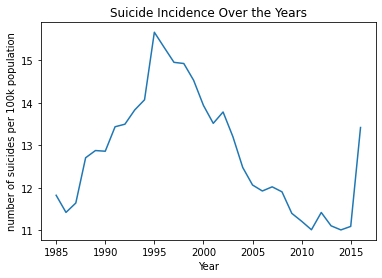

In [17]:
# x-axis from year 1985 to 2016
x = np.arange(1985, 2017)

# y-axis is the mean suicide no. per 100k population
y = raw_df.groupby('year')['suicides/100k pop'].mean()

# Create a line plot
sns.lineplot(x=x, y=y)
plt.xlabel('Year')
plt.ylabel('number of suicides per 100k population')
plt.title('Suicide Incidence Over the Years');

## Age and Gender Distribution of People Committing Suicide
Let's visualize the number of suicides by age and gender.

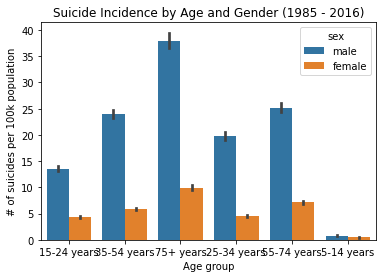

In [18]:
# Create a barplot 
sns.barplot(data=raw_df, x='age', y='suicides/100k pop', hue='sex')
plt.xlabel('Age group')
plt.ylabel('# of suicides per 100k population')
plt.title('Suicide Incidence by Age and Gender (1985 - 2016)');

## Numeric Variables Correlated with Suicide


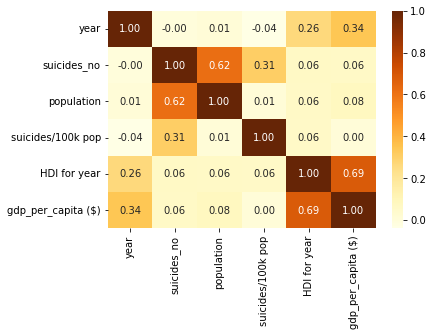

In [19]:
sns.heatmap(raw_df.corr(), annot=True, cmap='YlOrBr', fmt='.2f');

# PREPARE THE DATA FOR TRAINING

# 1. Create the target column

In [20]:
# Create additional column for suicide rate and set the default value as low
raw_df['suicide_rate'] = 'low' 

# Set the risk as high if suicides/100k pop is higher than the mean
raw_df.loc[raw_df['suicides/100k pop'] > raw_df['suicides/100k pop'].mean(), 'suicide_rate'] = 'high' 
raw_df['suicide_rate'].value_counts()

low     19061
high     8759
Name: suicide_rate, dtype: int64

# 2. Create Train, Validation and Test Sets

In [21]:
# Create a series containing number of data per year
year_dt = raw_df.year.value_counts()
year_dt.sort_index(inplace=True)
cum_pct = 100 * year_dt.cumsum() / year_dt.sum()
cum_pct

1985      2.070453
1986      4.140906
1987      6.470165
1988      8.583753
1989     10.826743
1990     13.587347
1991     16.347951
1992     19.151689
1993     21.955428
1994     24.888569
1995     28.253055
1996     31.574407
1997     34.895758
1998     38.303379
1999     41.883537
2000     45.593098
2001     49.388929
2002     53.098490
2003     56.808052
2004     60.431344
2005     64.054637
2006     67.721064
2007     71.430625
2008     75.097052
2009     78.936017
2010     82.731848
2011     86.441409
2012     89.935298
2013     93.386053
2014     96.750539
2015     99.424874
2016    100.000000
Name: year, dtype: float64

In [22]:
train_df = raw_df.loc[raw_df['year'] <= 2004]
val_df = raw_df.loc[(raw_df['year'] >= 2005) & (raw_df['year'] <=2010)]
test_df = raw_df.loc[raw_df['year'] >= 2011]

print('train_df.shape: ', train_df.shape)
print('val_df.shape: ', val_df.shape)
print('test_df.shape: ', test_df.shape)

train_df.shape:  (16812, 12)
val_df.shape:  (6204, 12)
test_df.shape:  (4804, 12)


# 3. Identify Input and Target Columns

In [23]:
# Identify Input and Target Columns
input_cols = ['country', 'sex', 'age', 'HDI for year', 'gdp_per_capita ($)']
target_col = 'suicide_rate'

In [24]:
train_inputs = train_df.loc[:, input_cols]
train_target = train_df.loc[:, target_col]

val_inputs = val_df.loc[:, input_cols]
val_target = val_df.loc[:, target_col]

test_inputs = test_df.loc[:, input_cols]
test_target = test_df.loc[:, target_col]

# 4. Identify the numeric and categorical columns

In [25]:
numeric_cols = list(train_inputs.select_dtypes(include=np.number).columns)
categorical_cols = list(train_inputs.select_dtypes(include='object').columns)

print('numeric columns: ', numeric_cols)
print('categorical columns: ', categorical_cols)

numeric columns:  ['HDI for year', 'gdp_per_capita ($)']
categorical columns:  ['country', 'sex', 'age']


# 5. Impute missing numeric values
We'll skip the step of missing value imputation as we have handled the missing values of HDI for year before performing exploratory data analysis. There is no null data in other columns.

# 6. Scaling the Numeric Features

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler to all the data
scaler = MinMaxScaler().fit(raw_df.loc[:, numeric_cols])

# Scale the train, validation and test sets 
train_inputs.loc[:, numeric_cols] = scaler.transform(train_inputs.loc[:, numeric_cols])
val_inputs.loc[:, numeric_cols] = scaler.transform(val_inputs.loc[:, numeric_cols])
test_inputs.loc[:, numeric_cols] = scaler.transform(test_inputs.loc[:, numeric_cols])

In [27]:


train_inputs[numeric_cols].describe()



,HDI for year,gdp_per_capita ($)
count,16812.000000,16812.000000
mean,0.471410,0.091012
std,0.187267,0.098749
min,0.000000,0.000000
25%,0.327549,0.016384
50%,0.457701,0.042918
75%,0.613883,0.153068
max,0.941432,0.637489


# 7. Encoding Categorical Columns

In [28]:
# Check the number of unique values of each categorical column
raw_df[categorical_cols].nunique()

country    101
sex          2
age          6
dtype: int64

In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore').fit(raw_df[categorical_cols])

In [59]:
warnings.filterwarnings("ignore")
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Encode the columns
train_inputs[encoded_cols] = encoder.transform(train_inputs.loc[:, categorical_cols]).toarray()
val_inputs[encoded_cols] = encoder.transform(val_inputs.loc[:, categorical_cols]).toarray()
test_inputs[encoded_cols] = encoder.transform(test_inputs.loc[:, categorical_cols]).toarray()

In [31]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# DECISION TREE

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, train_target)

DecisionTreeClassifier(random_state=1)

# EVALUATION

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_pred = tree.predict(X_train)
accuracy_score(train_target, train_pred)

1.0

In [34]:
val_pred = tree.predict(X_val)
accuracy_score(val_target, val_pred)

0.880883301096067

In [35]:
val_target.value_counts() / len(val_target)

low     0.705029
high    0.294971
Name: suicide_rate, dtype: float64

## Visualizing the Decision Tree

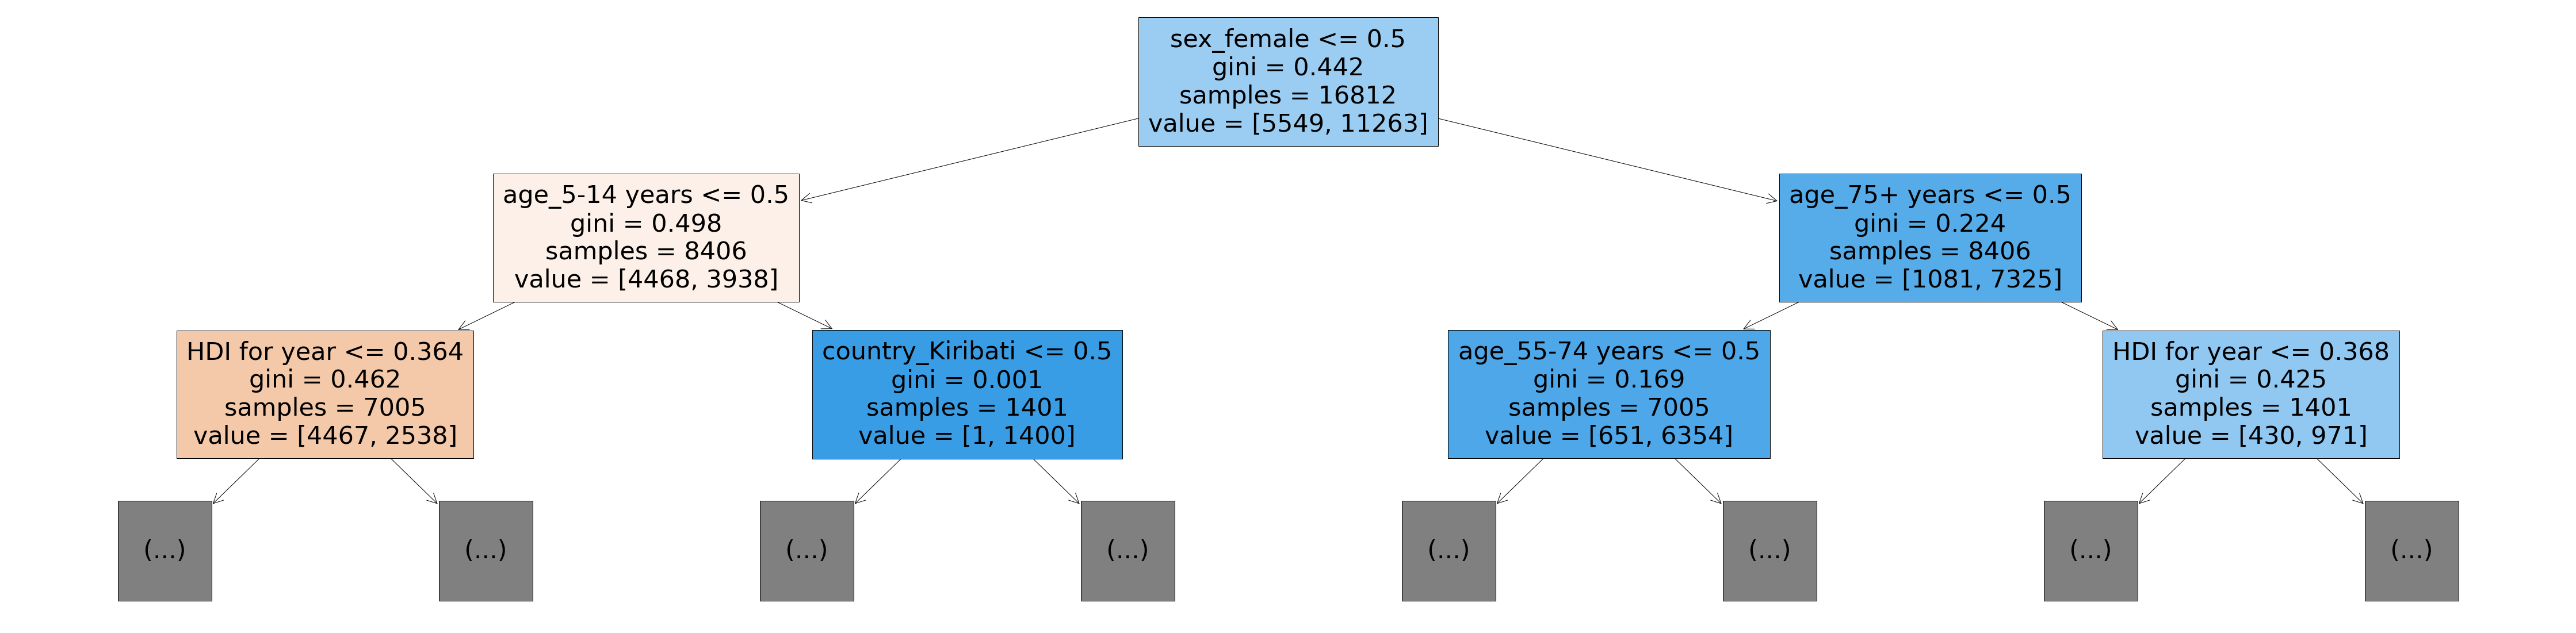

In [36]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80, 20))
plot_tree(tree, feature_names=X_train.columns, max_depth=2, filled=True);

# HYPERPARAMETER TUNING

# Max depth Tuning

In [37]:
# MAX DEPTH TUNING
tree.tree_.max_depth

48

In [38]:
def max_depth_tuning(md):
    tree = DecisionTreeClassifier(random_state=1, max_depth=md)
    tree.fit(X_train, train_target)
    train_pred = tree.predict(X_train)
    val_pred = tree.predict(X_val)
    train_error = 1 - accuracy_score(train_target, train_pred)
    val_error = 1 - accuracy_score(val_target, val_pred)
    return {'max_depth': md, 'train_error': train_error, 'val_error': val_error}

In [39]:
# Create a dataframe to store the tuning result
errors_df = pd.DataFrame([max_depth_tuning(md) for md in range(2, 43, 2)])

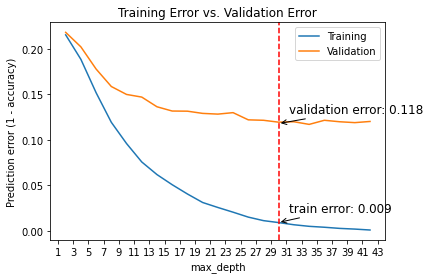

In [40]:
# Create a line plot to visualize training error and validation error against max_depth
fig, ax = plt.subplots()
sns.lineplot(data=errors_df, x='max_depth', y='train_error', ax=ax)
sns.lineplot(data=errors_df, x='max_depth', y='val_error', ax=ax)
plt.ylabel('Prediction error (1 - accuracy)')
plt.xticks(range(1, 44, 2))
plt.title('Training Error vs. Validation Error')
plt.legend(['Training', 'Validation'])

# Annotate the training error and validation error 
plt.axvline(x=30, color='r', linestyle='--')
ax.annotate('validation error: 0.118',
            xy=(30, 0.117988),
            xycoords='data',
            fontsize=12,
            xytext=(10, 10),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='black',
                            connectionstyle="arc3"))
ax.annotate('train error: 0.009',
            xy=(30, 0.009398),
            xycoords='data',
            fontsize=12,
            xytext=(10, 10),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='black',
                            connectionstyle="arc3"))
plt.show()

In [41]:
param_dict = {
    "max_depth": range(2, 40, 2),
    "min_samples_split": range(2, 10, 2)
}

In [42]:
X = pd.concat([X_train, X_val])
Y = pd.concat([train_target, val_target])
print(X.shape, Y.shape)

(23016, 111) (23016,)


In [43]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=1)
grid = GridSearchCV(tree, param_grid=param_dict)
grid.fit(X, Y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(2, 40, 2),
                         'min_samples_split': range(2, 10, 2)})

In [44]:
print('best params: ', grid.best_params_)
print('accuracy score: ', grid.best_score_)

best params:  {'max_depth': 34, 'min_samples_split': 2}
accuracy score:  0.8607489015304302


In [45]:
test_pred = grid.predict(X_test)
accuracy_score(test_target, test_pred)

0.9086178184845962

# Save Trained Model

In [46]:
# We use joblib module to save and load python objects on the disk

import joblib

In [47]:
suicide_rate_dt = {
    'model': grid,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [48]:
joblib.dump(suicide_rate_dt, 'suicide_rate_dt.joblib')

['suicide_rate_dt.joblib']

## Make new predictions on Inputs

In [49]:
suicide_rate_dt_clf = joblib.load('suicide_rate_dt.joblib')

In [50]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[model['numeric_cols']] = model['scaler'].transform(input_df[model['numeric_cols']])
    input_df[model['encoded_cols']] = model['encoder'].transform(input_df[model['categorical_cols']]).toarray()
    X_input = input_df[model['numeric_cols'] + model['encoded_cols']]
    pred = model['model'].predict(X_input)[0]
    prob = model['model'].predict_proba(X_input)[0][list(model['model'].classes_).index(pred)]
    return pred, prob

In [51]:
new_input = {
    'country': 'India',
    'year': 2021,
    'sex': 'male',
    'age': '15-24 years',
    'suicides_no': 1400,
    'population': 399235464,
    'suicides/100k pop': 155.55,
    'HDI for year': 0.645,
    'gdp_for_year ($)': '3,573,000,000,000,000',
    'gdp_per_capita ($)': 94566,
    'generation': 'Silent' 
}

In [52]:
warnings.filterwarnings("ignore")
predict_input(suicide_rate_dt_clf, new_input)

('low', 1.0)

In [53]:
new_input_2 = {
    'country': 'Singapore',
    'year': 2021,
    'sex': 'female',
    'age': '15-24 years',
    'suicides_no': 14,
    'population': 250000,
    'suicides/100k pop': 5.6,
    'HDI for year': 0.7,
    'gdp_for_year ($)': '300,000,000,000',
    'gdp_per_capita ($)': 80000,
    'generation': 'Millenials' 
}

In [54]:
warnings.filterwarnings("ignore")
predict_input(suicide_rate_dt_clf, new_input_2)

('low', 1.0)

## Chi-squared Test 
We have used chi-squared test to find out if there is any difference in number of 
suicides among sex and age groups.
The hypothesis statement for the test are:
H0: Suicide rate and age are independent
H1: Suicide rate and age are dependent

In [55]:
# Creating contingency table
contingency_table = pd.crosstab(raw_df['suicides/100k pop'],raw_df['age'])
# Significant level is 5%
alpha = 0.05

In [56]:
from scipy import stats
from scipy.stats import chi2_contingency
chistat, p, dof, expected = stats.chi2_contingency(contingency_table)

In [57]:
# Critical Value
critical_value = stats.chi2.ppf(q=1-alpha,df=dof)
print('Critical Value=',critical_value)

Critical Value= 26864.700169422224


In [58]:
# Compare chi_square statistic with critical_value and p-value which is the probability
# of getting chi-square>0.09
if chistat>=critical_value:
    print("Reject H0, Age group and Suicide rate is dependent")
else:
    print("Retain H0, Age group and Suicide rate is not dependent")
    
if p<=alpha:
    print("Reject H0, Age group and Suicide rate is dependent")
else:
    print("Retain H0, Age group and Suicide rate is not dependent")

Reject H0, Age group and Suicide rate is dependent
Reject H0, Age group and Suicide rate is dependent
